In [ ]:
max_features = 10000
maxlen = 500
batch_size = 64
epochs = 20

In [ ]:
import numpy as np
from tensorflow import keras
from tensorflow.keras.datasets import imdb
from tensorflow.keras.preprocessing import sequence
import matplotlib.pyplot as plt

In [ ]:
(x_train, y_train), (x_test, y_test) = imdb.load_data(num_words=max_features)
x_train = sequence.pad_sequences(x_train, maxlen=maxlen)
x_test = sequence.pad_sequences(x_test, maxlen=maxlen)

17464789/17464789 [==============================] - 0s 0us/step


In [ ]:
word_index = imdb.get_word_index()
reverse_word_index = dict([(value, key) for (key, value) in word_index.items()])

def decode_review(text):
    return ' '.join([reverse_word_index.get(i - 3, '?') for i in text])

for i in range(5):
    print(f"Review {i + 1}:")
    print(decode_review(x_train[i]))
    print(f"Label: {y_train[i]}\n")



1641221/1641221 [==============================] - 0s 0us/step
Review 1:
? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? this film was just brilliant casting location scenery story direction everyone's really suited the part they played and you could just imagine being there robert ? is an amazing actor and now the same being director ? father came from the same scottish island as myself so i loved the fact there was a real connection with this film the witty remarks throughout

In [ ]:
# SimpleRNN
model_rnn = keras.Sequential()
model_rnn.add(keras.layers.Embedding(max_features, 128, input_length=maxlen))
model_rnn.add(keras.layers.SimpleRNN(64))
model_rnn.add(keras.layers.Dense(1, activation='sigmoid'))

# LSTM
model_lstm = keras.Sequential()
model_lstm.add(keras.layers.Embedding(max_features, 128, input_length=maxlen))
model_lstm.add(keras.layers.LSTM(64))
model_lstm.add(keras.layers.Dense(1, activation='sigmoid'))

# Bidirectional LSTM
model_bilstm = keras.Sequential()
model_bilstm.add(keras.layers.Embedding(max_features, 128, input_length=maxlen))
model_bilstm.add(keras.layers.Bidirectional(keras.layers.LSTM(64)))
model_bilstm.add(keras.layers.Dense(1, activation='sigmoid'))


# Deep LSTM
model_deep_lstm = keras.Sequential()
model_deep_lstm.add(keras.layers.Embedding(max_features, 128, input_length=maxlen))
model_deep_lstm.add(keras.layers.LSTM(64, return_sequences=True))
model_deep_lstm.add(keras.layers.LSTM(64))
model_deep_lstm.add(keras.layers.Dense(1, activation='sigmoid'))

In [ ]:
models =[model_rnn, model_lstm, model_bilstm, model_deep_lstm]
model_names = ["SimpleRNN", "LSTM", "Bidirectional LSTM", "Deep LSTM"]
histories = []

for model, name in zip(models, model_names):
  model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])
  history = model.fit(x_train, y_train, batch_size=batch_size, epochs=epochs, validation_data=(x_test, y_test))
  histories.append((name, history))


Epoch 1/20
391/391 [==============================] - 201s 506ms/step - loss: 0.5513 - accuracy: 0.7038 - val_loss: 0.4545 - val_accuracy: 0.7936
Epoch 2/20
391/391 [==============================] - 197s 502ms/step - loss: 0.3353 - accuracy: 0.8570 - val_loss: 0.4396 - val_accuracy: 0.8108
Epoch 3/20
391/391 [==============================] - 186s 477ms/step - loss: 0.1708 - accuracy: 0.9351 - val_loss: 0.7450 - val_accuracy: 0.6540
Epoch 4/20
391/391 [==============================] - 184s 470ms/step - loss: 0.0863 - accuracy: 0.9709 - val_loss: 0.6964 - val_accuracy: 0.7773
Epoch 5/20
391/391 [==============================] - 182s 466ms/step - loss: 0.0192 - accuracy: 0.9950 - val_loss: 0.8018 - val_accuracy: 0.7866
Epoch 6/20
391/391 [==============================] - 183s 468ms/step - loss: 0.0053 - accuracy: 0.9992 - val_loss: 0.9353 - val_accuracy: 0.7666
Epoch 7/20
391/391 [==============================] - 182s 465ms/step - loss: 0.0461 - accuracy: 0.9834 - val_loss: 1.1097 -

In [ ]:
for name, history in histories:
  print(f'Model: {name}')
  print(f"Final Validation Accuracy: {history.history['val_accuracy'][-1]}")
  print()

Model: SimpleRNN
Final Validation Accuracy: 0.7712000012397766

Model: LSTM
Final Validation Accuracy: 0.7766799926757812

Model: Bidirectional LSTM
Final Validation Accuracy: 0.8438799977302551

Model: Deep LSTM
Final Validation Accuracy: 0.8558800220489502



Model: SimpleRNN
Final Validation Accuracy: 0.7712000012397766


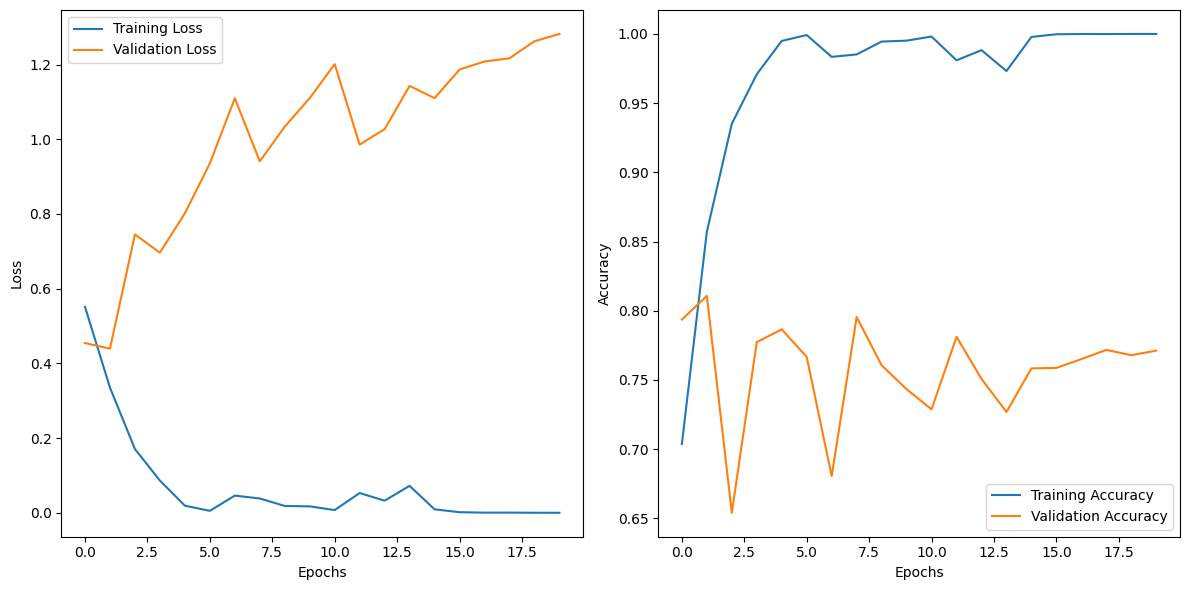

Model: LSTM
Final Validation Accuracy: 0.7766799926757812


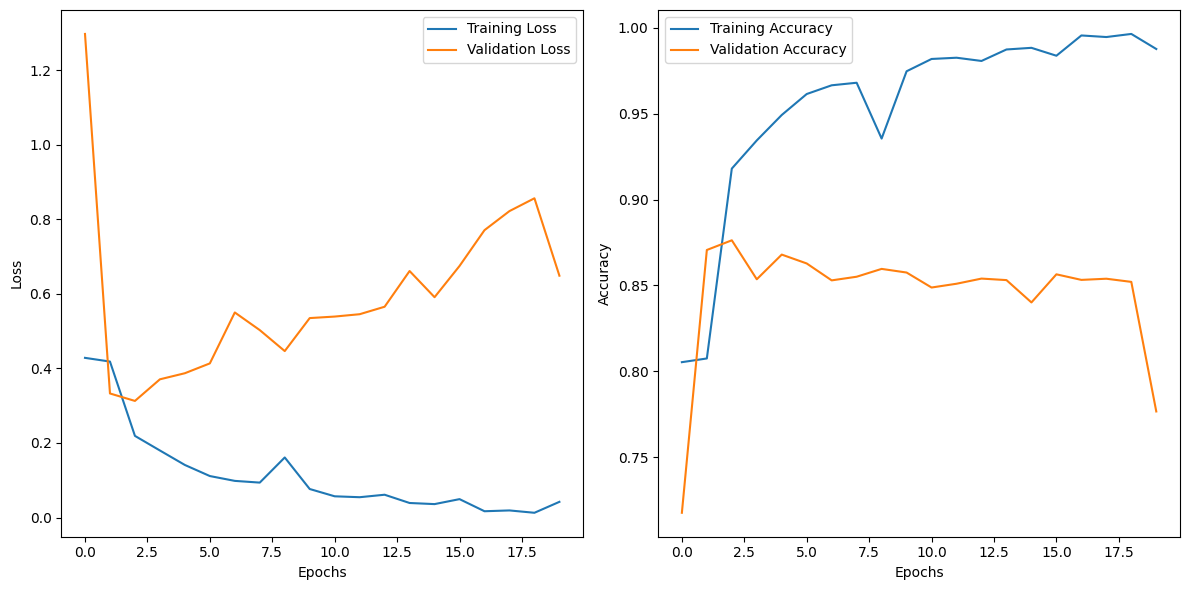

Model: Bidirectional LSTM
Final Validation Accuracy: 0.8438799977302551


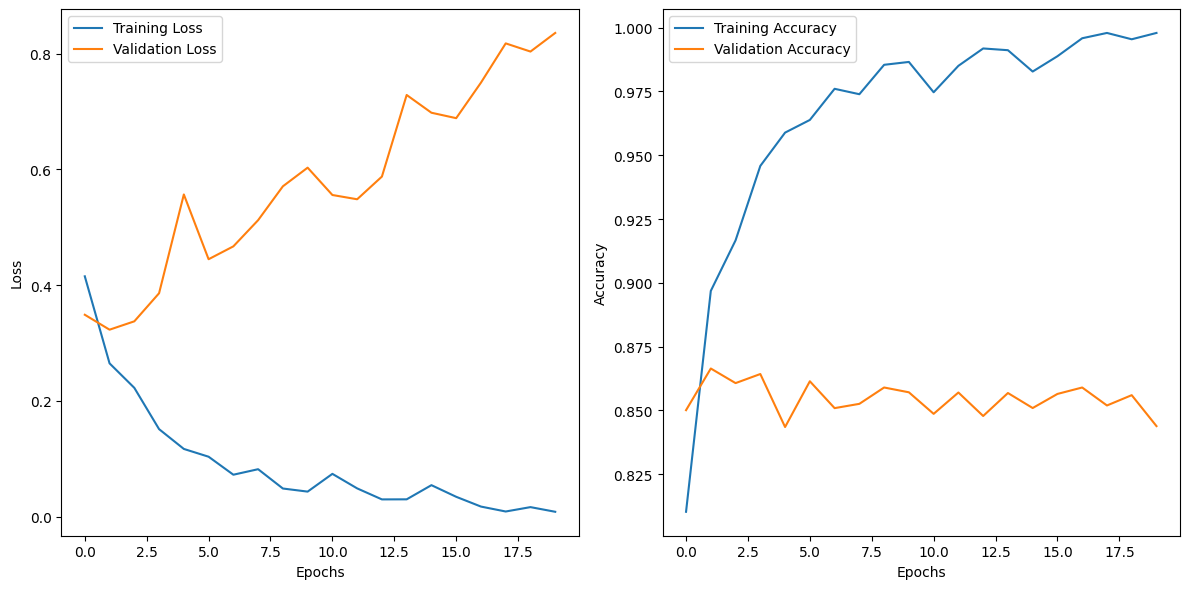

Model: Deep LSTM
Final Validation Accuracy: 0.8558800220489502


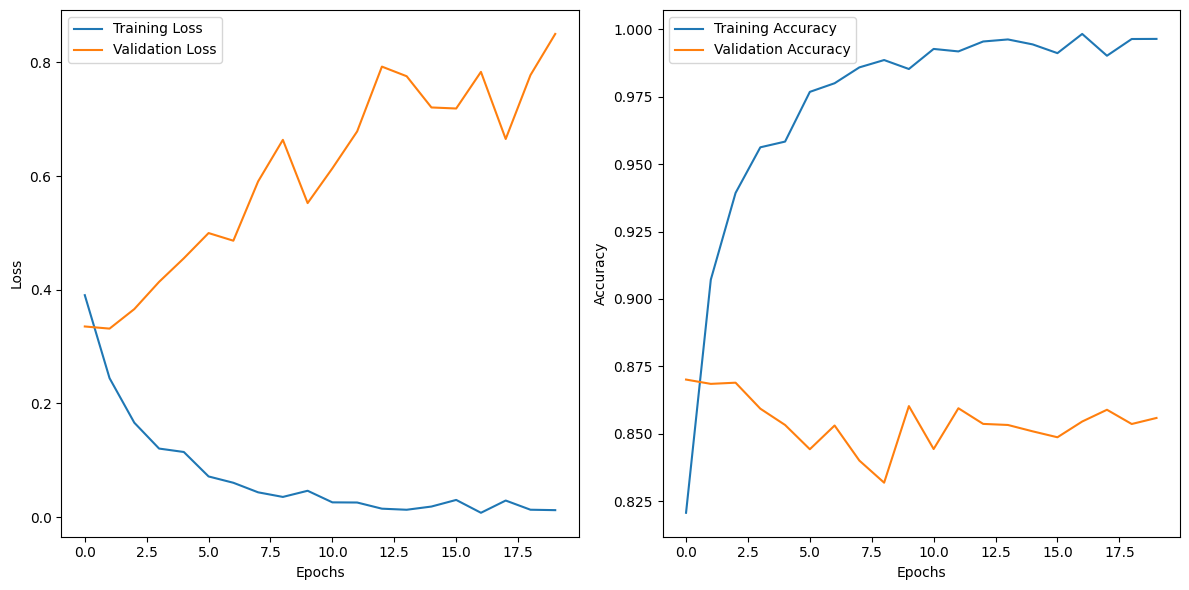

In [ ]:
for name, history in histories:
    print(f"Model: {name}")
    print(f"Final Validation Accuracy: {history.history['val_accuracy'][-1]}")

    plt.figure(figsize=(12, 6))
    plt.subplot(1, 2, 1)
    plt.plot(history.history['loss'], label='Training Loss')
    plt.plot(history.history['val_loss'], label='Validation Loss')
    plt.xlabel('Epochs')
    plt.ylabel('Loss')
    plt.legend()

    plt.subplot(1, 2, 2)
    plt.plot(history.history['accuracy'], label='Training Accuracy')
    plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
    plt.xlabel('Epochs')
    plt.ylabel('Accuracy')
    plt.legend()

    plt.tight_layout()
    plt.show()


**Висновок**

SimpleRNN - Найнижча точність серед усіх розглянутих моделей - близько 77,12%. Використовується менше параметрів, і навчання пройшло швидше, але це вплинуло на точність.

LSTM - практично та сама точність точність  - близько 77,76%.

Bidirectional LSTM - Досягла ще кращої точності порівняно зі звичайним LSTM - близько 84,39%. Використовує двосторонні LSTM шари, що дозволяє покращити розуміння контексту.

Deep LSTM - Найвища точність серед усіх розглянутих моделей - близько 85,59%. Використовує глибокий стек LSTM шарів, що дозволяє відтворити довготривалі залежності від контексту.

Deep LSTM та Bidirectional LSTM досягають найкращих результатів точності на цьому датасеті.

SimpleRNN, хоча швидший у навчанні, надає найгіршу точність і, швидше за все, не найкращий вибір для текстової класифікації на цьому датасеті.